## Aufgabe 1 Aufgabenteil 2
### 2.1

In [9]:
import pandas as pd

data = pd.read_pickle('./files/train.pickle')

imdb_score_mean = data['imdb_score'].mean()
imdb_score_std = data['imdb_score'].std()
imdb_votes_mean = data['imdb_votes'].mean()
imdb_votes_std = data['imdb_votes'].std()

print(f'imdb score:\n  mean: {round(imdb_score_mean, 2)}\n  standard deviation: {round(imdb_score_std, 2)}')
print(f'imdb votes:\n  mean: {round(imdb_votes_mean, 2)}\n  standard deviation: {round(imdb_votes_std, 2)}')

imdb score:
  mean: 6.49
  standard deviation: 1.144519749993518
imdb votes:
  mean: 21818.844180522567
  standard deviation: 69659.5398634057


### 2.2

### 2.3

### 2.4

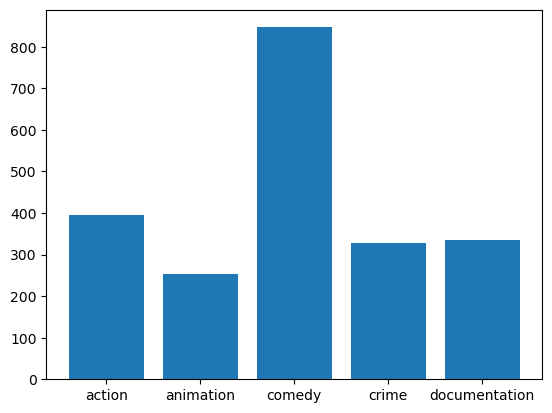

In [6]:
import matplotlib.pyplot as plot
import pandas as pd

data = pd.read_pickle('./files/train.pickle')

names = ['action', 'animation', 'comedy', 'crime', 'documentation']
values = []
for c in names:
    values.append(data[c].sum())

fix, ax = plot.subplots()

ax.bar(names, values)

plot.show()

### 2.5